# Simple Linear Regression

Linear Regression is one of the Machine Learning algorithms which is easy to understand and interpret. before starting with linear regression we ll try to understand what is linear Relationship

# Linear Relationship
Let’s take the example of men’s height and weight data. Let's Consider that we want to predict the Weight of a person on the basis of Height


In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/158/1*M8BB72-5Q2QQDLuaURkCVg.png")

# On X-axis Height and on Y-axis Weight

In [2]:
Image(url= "https://miro.medium.com/max/352/1*GEPOLD46ZG8je0DMt8NQpw.png")

A linear relationship describes a straight-line relationship between two variables
By observing the graph we can see there is a linear relationship between height and weight.
There are Mainly two assumptions associated with a Simple linear regression model:
Linearity: The relationship between X and Y is linear.
Normality: For any fixed value of X, Y is normally distributed


In [3]:
Image(url= "https://miro.medium.com/max/392/1*dWRHtUSX9RbiwNCACtddgw.png")

In [4]:
Image(url="https://miro.medium.com/max/387/1*V72j9cTS5CgI3IX1r66p0w.png")

# Equation For a Simple Linear Regression

y_Predict=mx+c

m=Slope of the line

c=Y intercept

x=independent Variable (Variable that helps to predict dependent variable)

y_predict=Dependent Variable (Variable that you want to predict)

in this case, x is Height & y is the Weight

Weight=Height * m + c

# Finding out m & C value
The values m and c must be chosen so that they minimize the cost function.


In [5]:
Image(url= "https://miro.medium.com/max/700/1*ZH-dSRYZUoMJsb_Y3pFjhw.png")

 If we don’t square the error then positive & negative value may get cancelled out.

# Gradient Descent
Gradient Descent is used to find out the value of the M & C in such a way that Error is Minimum.
It is an iterative algorithm which finds the optimal value of m & c in such a way that loss is minimum.


In [6]:
Image(url= "https://miro.medium.com/max/646/1*SlZ2UrV9NwySAl3MPEOL8g.png")


In [7]:
Image(url= "https://miro.medium.com/max/700/1*UXswYhP4HgEk6uj4miO3uQ.png")


This is an iterative process it keeps updating m & c value in such a way that loss should be minimized.

# Prediction
After getting m & c value we can easily do prediction by putting the value of x in the equation

y_pred = (value of m)* (value of x)+(Value of c)

# Python Implementation of Simple Linear Regression

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split # Creating training & Testing set
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # model 
%matplotlib inline

In [9]:
data=pd.read_csv(r"C:\Users\Ghost\data\Mens_height_weight.csv")

In [10]:
data.shape

(49, 2)

In [11]:
data

,Height,Weight
0,179,84
1,177,83
2,164,62
3,181,90
4,186,91
5,162,63
6,159,55
7,155,53
8,158,56
9,151,55


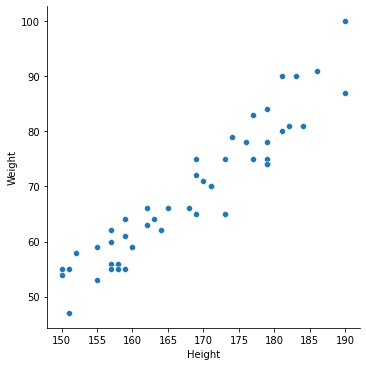

In [12]:
sns.relplot(x="Height",y="Weight",data=data)

D:\anaconda\envs\dtale\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

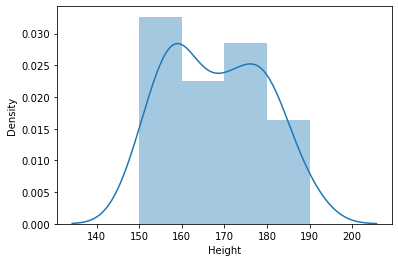

In [13]:
sns.distplot(data["Height"])

D:\anaconda\envs\dtale\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

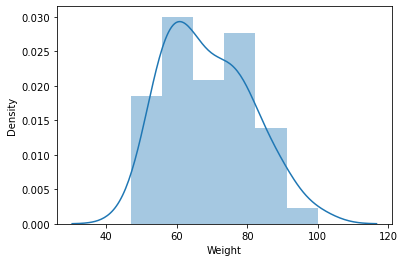

In [14]:
sns.distplot(data["Weight"])

In [15]:
data.corr()

,Height,Weight
Height,1.000000,0.942603
Weight,0.942603,1.000000


In [16]:
x=data["Height"] #independent 
y=data["Weight"] #Dependent (Variable that i want to predict)

In [17]:
x.shape #1 D array

(49,)

In [18]:
x_matrix=x.values.reshape(-1,1) #converting to 2D array as sklearn needs 2d array

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(x_matrix,y,test_size=0.30,random_state=101)

In [20]:
reg=LinearRegression() #model 

In [21]:
reg.fit(X_train,Y_train) # training the model intercept (constant) & slope 

LinearRegression()

In [22]:
reg.coef_

array([1.01169941])

In [23]:
reg.intercept_

-101.73399165720735

In [24]:
predictY=reg.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(Y_test, predictY) #Returns mean square error 
print(mse)

22.461826003852135


In [26]:
from math import sqrt
rmse=sqrt(mse)
print(rmse)

4.739390889539724


In [27]:
reg.score(X_train,Y_train)

0.9020237693810655

In [28]:
reg.score(X_test,Y_test)

0.849702288382004

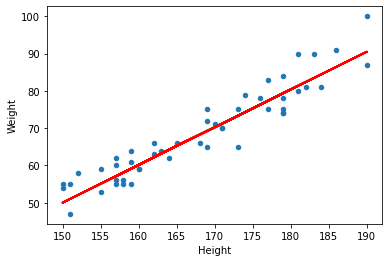

In [29]:
# first, plot the observed data
allpred=reg.predict(x_matrix)
data.plot(kind='scatter', x='Height', y='Weight')

# then, plot the least squares line
plt.plot(x, allpred, c='red', linewidth=2)

In [30]:
reg.predict(np.array(170).reshape(-1,1))

array([70.25490783])

In [31]:
import pickle as pk

In [33]:
filename = 'lr_model.pickle'
pk.dump(reg, open(filename, 'wb'))